In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.layers.convolutional import *
from keras import regularizers

import numpy as np
import matplotlib.pyplot as plt

## Get the fashion_mnist dataset from tensorflow.keras.datasets

In [2]:
from tensorflow.keras.datasets import fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Normalize the data
train_images = train_images / 255.0
test_images = test_images / 255.0

train_images.shape

(60000, 28, 28)

### Observe that the labels are not one-hot encoded

In [3]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

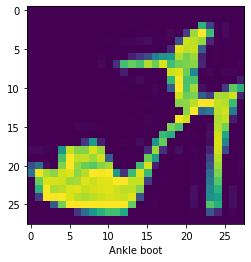

In [4]:
plt.figure()
#plt.subplot(5,5,13)
plt.imshow(train_images[9])
plt.xlabel(class_names[train_labels[0]])
plt.show()

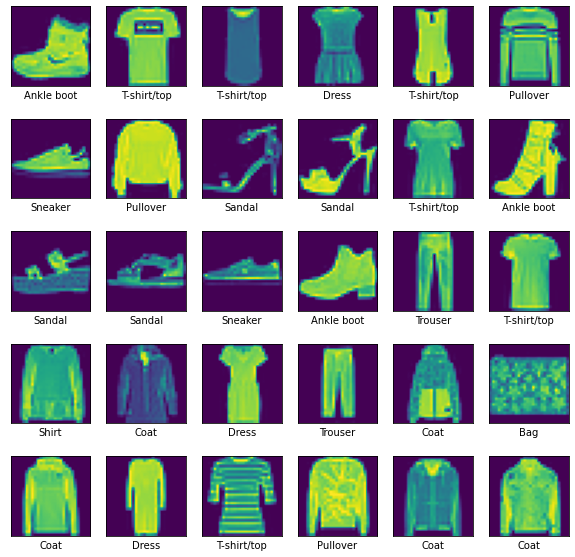

In [5]:
plt.figure(figsize=(10,10))
for i in range(30):
    plt.subplot(5,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #plt.imshow(train_images[i], cmap=plt.cm.binary) ## For Grayscale images
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i]])
plt.show()

### Build the Model

In [6]:
# Build a model
model = keras.Sequential([
    keras.layers.Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same', input_shape=(28,28,1), name='Conv2d_1'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01), name='Conv2d_2'),
    keras.layers.MaxPooling2D(pool_size=(2,2), strides=2),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu', name='Dense_1'),
    keras.layers.Dense(len(class_names), name='Dense_2'),
    #    keras.layers.Dense(10, activation='softmax', name='Dense_2'),
])

### Note: As the output labets are not one-hot encoded, we will use SparseCategoricalCrossentropy instead of CategoricalCrossentropy

In [7]:
# Compile the model
#model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])
model.compile(optimizer=keras.optimizers.RMSprop(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

In [8]:
# Fit the model to training data
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

model.fit(x=train_images, y=train_labels, batch_size=100, epochs=20)

Epoch 1/20
600/600 [==============================] - 11s 18ms/step - loss: 0.5854 - accuracy: 0.8084
Epoch 2/20
600/600 [==============================] - 11s 18ms/step - loss: 0.3930 - accuracy: 0.8684
Epoch 3/20
600/600 [==============================] - 11s 18ms/step - loss: 0.3464 - accuracy: 0.8841
Epoch 4/20
600/600 [==============================] - 11s 18ms/step - loss: 0.3184 - accuracy: 0.8921
Epoch 5/20
600/600 [==============================] - 11s 18ms/step - loss: 0.2995 - accuracy: 0.8988
Epoch 6/20
600/600 [==============================] - 11s 18ms/step - loss: 0.2844 - accuracy: 0.9041
Epoch 7/20
600/600 [==============================] - 11s 18ms/step - loss: 0.2734 - accuracy: 0.9078
Epoch 8/20
600/600 [==============================] - 11s 18ms/step - loss: 0.2617 - accuracy: 0.9122
Epoch 9/20
600/600 [==============================] - 11s 18ms/step - loss: 0.2533 - accuracy: 0.9148
Epoch 10/20
600/600 [==============================] - 11s 18ms/step - loss: 0.245

## Evaluate accuracy

In [9]:
# List of values returned by model.evaluate
model.metrics_names

['loss', 'accuracy']

In [10]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest LOSS:', test_loss)
print('\nTest ACCURACY:', test_acc)

313/313 - 1s - loss: 0.2802 - accuracy: 0.9093

Test LOSS: 0.280241459608078

Test ACCURACY: 0.9093000292778015


## Note: RMSprop optimizer has better accuracy and loss when compared to Adam optimizer

### Make predictions

In [11]:
predictions = model.predict(test_images)
predictions[0]

array([ -7.5931373 , -17.90024   ,  -8.88098   , -18.107546  ,
       -10.625177  ,  -5.1975455 ,  -8.108207  ,   0.20180486,
       -11.223894  ,   5.536736  ], dtype=float32)

## Build Prediction Model by adding Softmax layer to the model
### Softmax will covert the logits returned by dense layer to probabilities

In [12]:
probability_model = tf.keras.Sequential([model,  tf.keras.layers.Softmax()])
probability_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 10)                206170    
_________________________________________________________________
softmax (Softmax)            (None, 10)                0         
Total params: 206,170
Trainable params: 206,170
Non-trainable params: 0
_________________________________________________________________


In [13]:
predictions = probability_model.predict(test_images)
predictions[9]

array([1.7227162e-06, 3.5170694e-12, 5.5564757e-09, 9.3315349e-11,
       1.8909121e-11, 4.6889013e-06, 3.0408656e-10, 9.9999332e-01,
       2.9886298e-08, 2.1872384e-07], dtype=float32)

In [14]:
class_names[predictions[9].argmax()]

'Sneaker'

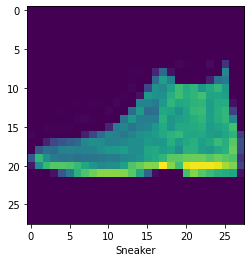

In [15]:
plt.figure()
plt.imshow(test_images[0])
plt.xlabel(class_names[test_labels[9]])
plt.show()